# Projet 9 : développez une preuve de concept

* [1. Mission](#partie1)
    * [1.1 Contexte](#partie1.1)
    * [1.2 Choix des modèles et des données](#partie1.2)
    * [1.3 Démarche adoptée](#partie1.3)
* [2. Préparation de l'environnement](#partie2)
    * [2.1 Installation des modules](#partie2.1)
    * [2.2 Librairies](#partie2.2)
    * [2.3 Fonctions](#partie2.3)
* [3. Exploration des données (EDA)](#partie3)
    * [3.1 Analyse de la Structure des Dossiers et des Fichiers](#partie3.1)
    * [3.2 Visualisation des Images et des Masques](#partie3.2)
    * [3.3 Distribution des Classes dans les Masques](#partie3.3)
    * [3.4 Analyse des Dimensions des Images et des Masques](#partie3.4)
    * [3.5 Analyse des Formats des Fichiers](#partie3.5)
    * [3.6 Vérification de la Qualité des Données](#partie3.6)
    * [3.7 Vérification de la Correspondance des Fichiers d'Annotations](#partie3.7)
* [4. Prétraitement des données](#partie4)
    * [4.1 Filtrage des groupes](#partie4.1)
    * [4.2 Data augmentation](#partie4.2)
    * [4.3 Data generator](#partie4.3)
    * [4.4 Charger le pipeline d'augmentation et initialiser les générateurs](#partie4.4)
* [5. Modélisation](#partie5)
    * [5.1 Fonction de perte](#partie5.1)
    * [5.2 FPN + Resnet](#partie5.2)
    * [5.3 FPN + ConvNext](#partie5.3)
* [6. Conclusion](#partie6)
* [7. Annexe](#partie7)

## <font color='red'>1. Mission</font><a class="anchor" id="partie1"></a>

##### <font color='blue'>1.1 Contexte</font><a class="anchor" id="partie1.1"></a>

Ce projet s'inscrit dans le cadre d'un test technique de recrutement chez DataSpace, une entreprise spécialisée en data science et machine learning. L'objectif de cette mission est de démontrer une capacité à effectuer une veille technologique, à mettre en œuvre un algorithme récent et à comparer ses performances avec un modèle baseline.

Objectifs du projet :
- Identifier un modèle de segmentation d’images récent (moins de 5 ans).
- Le comparer à un modèle baseline existant.
- Évaluer les performances sur un dataset librement choisi.
- Rédiger une note méthodologique détaillant la démarche.
- Développer un dashboard interactif pour visualiser les résultats.


##### <font color='blue'>1.2 Choix des modèles et des données</font><a class="anchor" id="partie1.2"></a>

- Dataset retenu : **Cityscapes**, un jeu de données dédié à la segmentation sémantique d’images urbaines.
- Modèle baseline : **FPN + ResNet50**, utilisé dans un projet précédent et bien connu pour la segmentation d’images.
- Modèle récent testé : **FPN + ConvNext** , un modèle convolutionnel moderne inspiré des Transformers. Cette approche permet une segmentation plus précise tout en conservant l’efficacité computationnelle des CNNs.

##### <font color='blue'>1.3 Démarche adoptée</font><a class="anchor" id="partie1.3"></a>

- Prétraitement des données : Chargement, augmentation et mise en forme des annotations.
- Entraînement des modèles : Implémentation de la baseline et du modèle récent.
- Évaluation des performances : Comparaison avec **IoU**, **Dice Score** et **Total Loss**.
- Synthèse des résultats : Comparaison chiffrée des performances.
- Développement du dashboard : Visualisation des prédictions des modèles.

## <font color='red'>2. Préparation de l'environnement</font><a class="anchor" id="partie2"></a>

##### <font color='blue'>2.1 Installation des modules</font><a class="anchor" id="partie2.1"></a>

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

##### <font color='blue'>2.2 Librairies</font><a class="anchor" id="partie2.2"></a>

In [ ]:
import os
import time
import json
import datetime
import numpy as np
import pandas as pd
from collections import defaultdict
from PIL import Image
from collections import Counter
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.models as models
from torchvision.models import ResNet50_Weights
from transformers import Mask2FormerForUniversalSegmentation, AutoImageProcessor
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import WeightedRandomSampler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torchmetrics
from torchmetrics import JaccardIndex, F1Score
import time
from tqdm import tqdm

# Vérifier si CUDA est disponible (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de l'appareil : {device}")

Utilisation de l'appareil : cuda


In [ ]:
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)

Torch: 2.5.1+cu124
Torchvision: 0.20.1+cu124


##### <font color='blue'>2.3 Fonctions</font><a class="anchor" id="partie2.3"></a>

In [ ]:
def load_file_paths(images_path, masks_path, data_cat="train"):
    """
    Charge les chemins des images et des masques pour un type de données spécifique.

    Args:
        images_path (str): Chemin du dossier des images.
        masks_path (str): Chemin du dossier des masques.
        data_cat (str): Type de données ("train", "val", "test").

    Returns:
        list, list: Listes des chemins des images et des masques.
    """
    images_dir = os.path.join(images_path, data_cat)
    masks_dir = os.path.join(masks_path, data_cat)

    # Vérification des répertoires
    if not os.path.exists(images_dir):
        raise FileNotFoundError(f"Le répertoire {images_dir} n'existe pas.")
    if not os.path.exists(masks_dir):
        raise FileNotFoundError(f"Le répertoire {masks_dir} n'existe pas.")

    cities = os.listdir(images_dir)
    image_files, mask_files = [], []

    for city in cities:
        city_img_dir = os.path.join(images_dir, city)
        city_mask_dir = os.path.join(masks_dir, city)

        # Vérifier si le sous-dossier existe dans "masks_path"
        if not os.path.exists(city_mask_dir):
            print(f"Attention : Le dossier des masques pour la ville '{city}' est manquant.")
            continue

        # Charger les fichiers
        city_images = [os.path.join(city_img_dir, f) for f in os.listdir(city_img_dir) if f.endswith("_leftImg8bit.png")]
        city_masks = [os.path.join(city_mask_dir, f) for f in os.listdir(city_mask_dir) if f.endswith("_gtFine_labelIds.png")]

        if len(city_images) != len(city_masks):
            print(f"Attention : Incohérence dans le nombre de fichiers pour la ville '{city}'.")

        image_files.extend(sorted(city_images))
        mask_files.extend(sorted(city_masks))

    return image_files, mask_files

In [ ]:
def show_image_and_mask(image_path, mask_path, save_path=None):
    """
    Affiche une image et son masque côte à côte.
    Si un chemin est fourni, enregistre la figure au format PNG.

    Args:
        image_path (str): Chemin de l'image RGB.
        mask_path (str): Chemin du masque associé.
        save_path (str, optional): Chemin pour sauvegarder l'image.
    """
    img = Image.open(image_path)
    mask = Image.open(mask_path)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img)
    ax[0].set_title("Image RGB")
    ax[0].axis("off")

    ax[1].imshow(mask)
    ax[1].set_title("Masque (color)")
    ax[1].axis("off")

    # Enregistrer l’image si un chemin est fourni
    if save_path:
        fig.savefig(save_path, bbox_inches="tight")

    plt.show()

In [ ]:
def analyze_class_distribution(masks_path):
    """
    Analyse la distribution des classes dans les masques d'annotations.

    Args:
        masks_path (str): Chemin vers le dossier contenant les masques.

    Returns:
        dict: Dictionnaire contenant la distribution des classes.
    """
    class_counts = Counter()

    for root, _, files in os.walk(masks_path):
        for file in files:
            if file.endswith("_gtFine_labelIds.png"):
                mask_path = os.path.join(root, file)
                mask = np.array(Image.open(mask_path))
                class_counts.update(mask.flatten())

    return class_counts

In [ ]:
def plot_class_distribution(class_counts, save_path=None):
    """
    Affiche et enregistre la distribution des classes sous forme de graphique.

    Args:
        class_counts (dict): Distribution des classes sous forme de dictionnaire.
        save_path (str, optional): Chemin pour sauvegarder le graphique. Si None, il affiche seulement.
    """
    plt.figure(figsize=(10, 5))
    plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
    plt.xlabel("Classes")
    plt.ylabel("Nombre de pixels")
    plt.title("Distribution des classes")

    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()

In [ ]:
def analyze_image_dimensions(images_path, masks_path):
    """
    Analyse les dimensions des images et des masques.

    Args:
        images_path (str): Chemin du dossier contenant les images.
        masks_path (str): Chemin du dossier contenant les masques.

    Returns:
        dict: Dictionnaire contenant les dimensions des images et des masques.
    """
    dimensions = {"images": [], "masks": []}

    for root, _, files in os.walk(images_path):
        for file in files:
            if file.endswith("_leftImg8bit.png"):
                img = Image.open(os.path.join(root, file))
                dimensions["images"].append(img.size)

    for root, _, files in os.walk(masks_path):
        for file in files:
            if file.endswith("_gtFine_labelIds.png"):
                mask = Image.open(os.path.join(root, file))
                dimensions["masks"].append(mask.size)

    # Compter la fréquence des dimensions
    img_dim_counts = Counter(dimensions["images"])
    mask_dim_counts = Counter(dimensions["masks"])

    return img_dim_counts, mask_dim_counts

In [ ]:
def analyze_file_formats(images_path, masks_path):
    image_formats = set()
    mask_formats = set()

    for root, _, files in os.walk(images_path):
        for file in files:
            image_formats.add(os.path.splitext(file)[1])

    for root, _, files in os.walk(masks_path):
        for file in files:
            mask_formats.add(os.path.splitext(file)[1])

    print("Formats des fichiers d'images :", image_formats)
    print("Formats des fichiers de masques :", mask_formats)

    return image_formats, mask_formats

In [ ]:
def filter_groups_in_mask(mask_path, class_to_group):
    mask = np.array(Image.open(mask_path))
    group_mask = np.zeros_like(mask)
    for cls, grp in class_to_group.items():
        group_mask[mask == cls] = grp
    return group_mask

def apply_cityscapes_palette(group_mask):
    cityscapes_palette = [
        (128, 64, 128),  # road (flat)
        (244, 35, 232),  # sidewalk (flat)
        (70, 70, 70),    # building (construction)
        (102, 102, 156), # wall (construction)
        (190, 153, 153), # fence (construction)
        (153, 153, 153), # pole (object)
        (250, 170, 30),  # traffic light (object)
        (220, 220, 0),   # traffic sign (object)
        (107, 142, 35),  # vegetation (nature)
        (152, 251, 152), # terrain (nature)
        (70, 130, 180),  # sky (sky)
        (220, 20, 60),   # person (human)
        (255, 0, 0),     # rider (human)
        (0, 0, 142),     # car (vehicle)
        (0, 0, 70),      # truck (vehicle)
        (0, 60, 100),    # bus (vehicle)
        (0, 80, 100),    # on rails (vehicle)
        (0, 0, 230),     # motorcycle (vehicle)
        (119, 11, 32),   # bicycle (vehicle)
        (0, 0, 0)        # void
    ] + [(0, 0, 0)] * (256 - 20)

    pil_mask = Image.fromarray(group_mask.astype('uint8'))
    flat_palette = [value for color in cityscapes_palette for value in color]
    pil_mask.putpalette(flat_palette)
    return pil_mask

In [ ]:
def check_file_integrity(images_path, masks_path):
    issues = {"unreadable_images": [], "unreadable_masks": []}

    # Vérifier les images
    for root, _, files in os.walk(images_path):
        for file in files:
            if file.endswith(".png"):
                file_path = os.path.join(root, file)
                try:
                    img = Image.open(file_path)
                    img.verify()
                except Exception as e:
                    issues["unreadable_images"].append((file_path, str(e)))
                    os.remove(file_path)  # Suppression automatique

    # Vérifier les masques
    for root, _, files in os.walk(masks_path):
        for file in files:
            if file.endswith(".png"):
                file_path = os.path.join(root, file)
                try:
                    mask = Image.open(file_path)
                    mask.verify()
                except Exception as e:
                    issues["unreadable_masks"].append((file_path, str(e)))
                    os.remove(file_path)

    print(f"Nombre d'images illisibles supprimées : {len(issues['unreadable_images'])}")
    print(f"Nombre de masques illisibles supprimés : {len(issues['unreadable_masks'])}")
    return issues

In [ ]:
def check_annotation_completeness(images_path, masks_path):
    """
    Vérifie que chaque image RGB a ses fichiers d'annotations associés.

    Args:
        images_path (str): Chemin vers le dossier contenant les images.
        masks_path (str): Chemin vers le dossier contenant les masques.

    Returns:
        list: Liste des problèmes de correspondance (image, fichier manquant).
    """
    issues = []
    for root, _, files in os.walk(images_path):
        for file in files:
            if file.endswith("_leftImg8bit.png"):
                base_name = file.replace("_leftImg8bit.png", "")
                mask_dir = root.replace("leftImg8bit", "gtFine")
                expected_files = [
                    f"{base_name}_gtFine_color.png",
                    f"{base_name}_gtFine_instanceIds.png",
                    f"{base_name}_gtFine_labelIds.png",
                    f"{base_name}_gtFine_polygons.json",
                ]
                # Vérifier la présence des fichiers
                for expected_file in expected_files:
                    if not os.path.exists(os.path.join(mask_dir, expected_file)):
                        issues.append((file, expected_file))
    return issues

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_mapping):
    """Affiche une matrice de confusion normalisée avec les noms des classes réelles."""
    labels = class_mapping  # Extraire les noms des classes

    cm = confusion_matrix(y_true.flatten(), y_pred.flatten(), labels=range(len(labels)))
    cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)  # Normalisation

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Prédictions")
    plt.ylabel("Vérités")
    plt.title("Matrice de Confusion Normalisée")
    plt.show()

In [ ]:
def compute_class_frequencies(mask_paths, num_classes=19):
    """
    Calcule la fréquence des classes dans l'ensemble d'entraînement.
    """
    class_counts = np.zeros(num_classes, dtype=np.int64)

    for mask_path in mask_paths:
        mask = np.array(Image.open(mask_path))  # Charger le masque
        unique, counts = np.unique(mask, return_counts=True)
        for cls, count in zip(unique, counts):
            if cls < num_classes:  # Éviter les valeurs hors classe
                class_counts[cls] += count

    total_pixels = np.sum(class_counts)
    class_frequencies = class_counts / total_pixels
    return class_frequencies

In [ ]:
def create_weighted_sampler(mask_paths, num_samples, num_classes=19):
    """
    Crée un Weighted Sampler basé sur la fréquence des classes.
    """
    sample_weights = []

    for mask_path in mask_paths:
        mask = np.array(Image.open(mask_path))
        unique, counts = np.unique(mask, return_counts=True)

        # Filtrer uniquement les classes valides [0, num_classes-1]
        valid_indices = [i for i, cls in enumerate(unique) if cls < num_classes]
        unique = unique[valid_indices]
        counts = counts[valid_indices]

        # Calcul des poids
        weight = sum(class_weights[cls] * count for cls, count in zip(unique, counts))
        sample_weights.append(weight)

    return WeightedRandomSampler(sample_weights, num_samples, replacement=True)

In [ ]:
def postprocess_segmentation(y_pred, group_to_class):
    """
    Convertit les sorties du modèle en masque segmenté final.

    Args:
        y_pred (torch.Tensor): Sortie du modèle [B, num_classes, H, W].
        group_to_class (dict): Mapping inverse pour revenir aux classes Cityscapes.

    Returns:
        np.array: Masque segmenté (B, H, W).
    """
    # Prendre la classe avec la plus grande probabilité
    y_pred = torch.argmax(y_pred, dim=1).cpu().numpy()

    # Remapper vers les classes originales
    remapped_masks = np.vectorize(lambda x: group_to_class.get(x, 0))(y_pred)

    return remapped_masks

## <font color='red'>3. Exploration des données (EDA)</font><a class="anchor" id="partie3"></a>

In [ ]:
import os
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

# Définir les chemins des images et masques
images_path = "/content/drive/My Drive/projet 8/P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit"
masks_path = "/content/drive/My Drive/projet 8/P8_Cityscapes_gtFine_trainvaltest/gtFine"

# Vérification des fichiers
if not os.path.exists(images_path) or not os.path.exists(masks_path):
    raise FileNotFoundError("Vérifiez que les chemins des dossiers sont corrects.")

Mounted at /content/drive


In [ ]:
import glob

# Récupération des chemins des images et masques
train_images = sorted(glob.glob(os.path.join(images_path, "train", "**", "*.png"), recursive=True))
train_masks = sorted(glob.glob(os.path.join(masks_path, "train", "**", "*_gtFine_labelIds.png"), recursive=True))

val_images = sorted(glob.glob(os.path.join(images_path, "val", "**", "*.png"), recursive=True))
val_masks = sorted(glob.glob(os.path.join(masks_path, "val", "**", "*_gtFine_labelIds.png"), recursive=True))

# Vérification
print(f"Nombre d'images d'entraînement : {len(train_images)}")
print(f"Nombre de masques d'entraînement : {len(train_masks)}")
print(f"Nombre d'images de validation : {len(val_images)}")
print(f"Nombre de masques de validation : {len(val_masks)}")

Nombre d'images d'entraînement : 2975
Nombre de masques d'entraînement : 2975
Nombre d'images de validation : 500
Nombre de masques de validation : 500


##### <font color='blue'>3.1 Analyse de la Structure des Dossiers et des Fichiers</font><a class="anchor" id="partie3.1"></a>

In [ ]:
# Vérification des dossiers
images_dirs = os.listdir(images_path)
masks_dirs = os.listdir(masks_path)

print("Contenu des dossiers :")
print("Images :", images_dirs)
print("Masques :", masks_dirs)

# Chargement des chemins des fichiers
train_images, train_masks = load_file_paths(images_path, masks_path, "train")
val_images, val_masks = load_file_paths(images_path, masks_path, "val")
test_images, test_masks = load_file_paths(images_path, masks_path, "test")

# Affichage du nombre de fichiers par dataset
print(f"Nombre d'images d'entraînement : {len(train_images)}")
print(f"Nombre de masques d'entraînement : {len(train_masks)}")
print(f"Nombre d'images de validation : {len(val_images)}")
print(f"Nombre de masques de validation : {len(val_masks)}")
print(f"Nombre d'images de test : {len(test_images)}")
print(f"Nombre de masques de test : {len(test_masks)}")

print("Analyse de la structure des fichiers terminée.")

##### <font color='blue'>3.2 Visualisation des Images et des Masques</font><a class="anchor" id="partie3.2"></a>

In [ ]:
image_path_exemple = "/content/drive/My Drive/projet 8/P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png"
mask_path_exemple = "/content/drive/My Drive/projet 8/P8_Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000000_000019_gtFine_color.png"

# Affichage de l'image et du masque
show_image_and_mask(image_path_exemple, mask_path_exemple)

print("Visualisation terminée.")

##### <font color='blue'>3.3 Distribution des Classes dans les Masques</font><a class="anchor" id="partie3.3"></a>

In [ ]:
def extract_class_distribution(masks_path):
    """
    Analyse tous les masques pour récupérer les IDs de classe présents et leur fréquence.

    Args:
        masks_path (str): Chemin vers le dossier contenant les masques.

    Returns:
        dict: Dictionnaire des classes trouvées avec leur nombre total de pixels.
    """
    class_counts = Counter()

    for root, _, files in os.walk(masks_path):
        for file in files:
            if file.endswith("_gtFine_labelIds.png"):  # Fichiers contenant les classes
                mask_path = os.path.join(root, file)
                mask = np.array(Image.open(mask_path))
                class_counts.update(mask.flatten())

    return dict(class_counts)

# Définir le chemin vers les masques
masks_path = "/content/drive/My Drive/projet 8/P8_Cityscapes_gtFine_trainvaltest/gtFine/train"

# Générer le mapping des classes
class_distribution = extract_class_distribution(masks_path)

# Affichage des résultats
print("Mapping exact des classes Cityscapes présentes dans les masques :")
print(class_distribution)

In [ ]:
# Étape 1 : Analyser la distribution des classes
masks_path = "/content/drive/My Drive/projet 8/P8_Cityscapes_gtFine_trainvaltest/gtFine/train"
class_counts = analyze_class_distribution(masks_path)  # Utilisation de la fonction existante

# Étape 2 : Mapping officiel des classes Cityscapes
cityscapes_class_mapping = {
    0: "unlabeled", 1: "ego vehicle", 2: "rectification border", 3: "out of roi",
    4: "static", 5: "dynamic", 6: "ground", 7: "road", 8: "sidewalk",
    9: "building", 10: "wall", 11: "fence", 12: "pole", 13: "traffic light",
    14: "traffic sign", 15: "vegetation", 16: "terrain", 17: "sky", 18: "person",
    19: "rider", 20: "car", 21: "truck", 22: "bus", 23: "train", 24: "motorcycle",
    25: "bicycle", 26: "void", 27: "void", 28: "void", 29: "void", 30: "void",
    31: "void", 32: "void", 33: "void"
}

# Étape 3 : Trier les classes par nombre de pixels (du plus grand au plus petit)
sorted_class_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)[:20]

# Étape 4 : Récupérer les noms des classes à partir du mapping
class_ids, pixel_counts = zip(*sorted_class_counts)
class_names = [cityscapes_class_mapping.get(cls_id, f"Unknown ({cls_id})") for cls_id in class_ids]

# Étape 5 : Affichage du graphique
plt.figure(figsize=(12, 5))
plt.bar(class_names, pixel_counts, color="skyblue")
plt.xlabel("Classes")
plt.ylabel("Nombre de pixels")
plt.title("Top 20 des classes les plus représentées")
plt.xticks(rotation=45, ha="right")  # Rotation pour lisibilité
plt.show()

# Étape 6 : Vérification des classes affichées
print("Top 20 classes avec leur ID et leur nombre de pixels :")
for cls_id, cls_name, count in zip(class_ids, class_names, pixel_counts):
    print(f"ID: {cls_id}, Nom: {cls_name}, Pixels: {count}")

##### <font color='blue'>3.4 Analyse des Dimensions des Images et des Masques</font><a class="anchor" id="partie3.4"></a>

In [ ]:
# Exécuter l’analyse des dimensions
img_dim_counts, mask_dim_counts = analyze_image_dimensions(images_path, masks_path)

# Afficher les tailles uniques trouvées
print(f"Nombre de dimensions uniques pour les images : {len(img_dim_counts)}")
print(f"Nombre de dimensions uniques pour les masques : {len(mask_dim_counts)}")

# Affichage détaillé des fréquences des dimensions
print("\nDistribution des dimensions des images :")
for dim, count in img_dim_counts.items():
    print(f" - {dim[0]}x{dim[1]} : {count} occurrences")

print("\nDistribution des dimensions des masques :")
for dim, count in mask_dim_counts.items():
    print(f" - {dim[0]}x{dim[1]} : {count} occurrences")

print("Analyse des dimensions des images et des masques terminée.")

##### <font color='blue'>3.5 Analyse des Formats des Fichiers</font><a class="anchor" id="partie3.5"></a>

In [ ]:
# Exécuter l’analyse des formats
img_formats, mask_formats = analyze_file_formats(images_path, masks_path)

# Affichage des formats uniques
print(f"Formats uniques des images : {', '.join(sorted(img_formats))}")
print(f"Formats uniques des masques : {', '.join(sorted(mask_formats))}")

# Compter le nombre de fichiers par format
def count_files_by_format(directory, formats):
    format_counts = {fmt: 0 for fmt in formats}
    for root, _, files in os.walk(directory):
        for file in files:
            for fmt in formats:
                if file.endswith(fmt):
                    format_counts[fmt] += 1
    return format_counts

# Comptage et affichage
img_format_counts = count_files_by_format(images_path, img_formats)
mask_format_counts = count_files_by_format(masks_path, mask_formats)

print("\nNombre de fichiers par format d'image :")
for fmt, count in img_format_counts.items():
    print(f" - {fmt} : {count} fichiers")

print("\nNombre de fichiers par format de masque :")
for fmt, count in mask_format_counts.items():
    print(f" - {fmt} : {count} fichiers")

print("Analyse des formats des fichiers terminée.")

##### <font color='blue'>3.6 Vérification de la Qualité des Données</font><a class="anchor" id="partie3.6"></a>

In [ ]:
# Vérification de l'intégrité des fichiers
issues = check_file_integrity(images_path, masks_path)

# Affichage des résultats
print(f"\nNombre d'images illisibles supprimées : {len(issues['unreadable_images'])}")
print(f"Nombre de masques illisibles supprimés : {len(issues['unreadable_masks'])}")

# Sauvegarde de la liste des fichiers supprimés dans un fichier local
deleted_files_path = "deleted_files.json"
with open(deleted_files_path, "w") as f:
    json.dump(issues, f, indent=4)

print(f"Liste des fichiers supprimés sauvegardée dans {deleted_files_path}")
print("Vérification de la qualité des données terminée.")

##### <font color='blue'>3.7 Vérification de la Correspondance des Fichiers d'Annotations</font><a class="anchor" id="partie3.7"></a>

In [ ]:
# Vérification de la correspondance des fichiers d'annotations
annotation_issues = check_annotation_completeness(images_path, masks_path)

# Affichage des résultats
if annotation_issues:
    print(f"Nombre de problèmes détectés : {len(annotation_issues)}")
    print("Exemples de problèmes détectés :")
    for img, missing in annotation_issues[:10]:  # Afficher seulement 10 exemples
        print(f" - Image : {img} | Fichier manquant : {missing}")
else:
    print("Toutes les images ont leurs fichiers d'annotations associés.")

# Sauvegarde locale de la liste des fichiers manquants
annotation_issues_path = "annotation_issues.json"
with open(annotation_issues_path, "w") as f:
    json.dump(annotation_issues, f, indent=4)

print(f"Liste des problèmes d'annotations sauvegardée dans {annotation_issues_path}")
print("Vérification de la correspondance des fichiers terminée.")

## <font color='red'>4. Prétraitement des données</font><a class="anchor" id="partie4"></a>

##### <font color='blue'>4.1 Filtrage des groupes</font><a class="anchor" id="partie4.1"></a>

In [ ]:
class_to_group = {
    -1: 0,  # License plate (ignored in evaluation)
    0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0,  # Void classes
    7: 1, 8: 1, 9: 1, 10: 1,  # Flat surfaces (Road, Sidewalk, Parking, Rail track)
    11: 2, 12: 2, 13: 2,  # Construction (Building, Wall, Fence)
    14: 2, 15: 2, 16: 2,  # Construction (Guard rail, Bridge, Tunnel)
    17: 3, 18: 3, 19: 3, 20: 3,  # Objects (Poles, Traffic light, Traffic sign)
    21: 4, 22: 4,  # Nature (Vegetation, Terrain)
    23: 5,  # Sky
    24: 6, 25: 6,  # Human (Person, Rider)
    26: 7, 27: 7, 28: 7, 29: 7, 30: 7, 31: 7, 32: 7, 33: 7  # Vehicles (Car, Truck, Bus, Train, Motorcycle, Bicycle)
}

def filter_groups_in_mask(mask_path, class_to_group):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = np.vectorize(lambda x: class_to_group.get(x, 0))(mask)
    return mask

##### <font color='blue'>4.2 Data augmentation</font><a class="anchor" id="partie4.2"></a>

La data augmentation est volontairement légère car c'est celle-ci qui a eu les meilleurs scores lors du projet 8.

In [ ]:
def get_augmentation_pipeline():
    """
    Crée une pipeline d'augmentations dynamiques pour les images et les masques.
    Returns:
        albumentations.Compose: Pipeline d'augmentations.
    """
    augmentation = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.Resize(height=512, width=512)
    ])
    return augmentation

##### <font color='blue'>4.3 Data generator</font><a class="anchor" id="partie4.3"></a>

In [ ]:
class CityscapesDataset(Dataset):
    def __init__(self, image_paths, mask_paths, img_size=(512, 512), augmentation=None, class_to_group=None, num_classes=8):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.img_size = img_size
        self.augmentation = augmentation
        self.class_to_group = class_to_group
        self.num_classes = num_classes
        self.mapping_array = np.zeros(34, dtype=np.uint8)
        if self.class_to_group:
            for k, v in class_to_group.items():
                self.mapping_array[k] = v
        self.class_weights = self.compute_class_weights()

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image = cv2.imread(self.image_paths[index])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = T.ToPILImage()(image)  # Convertir l’image en PIL
        mask = cv2.imread(self.mask_paths[index], cv2.IMREAD_GRAYSCALE)
        mask = T.ToPILImage()(mask)  # Convertir le masque en PIL

        # Appliquer resize avec PyTorch
        resize_transform = T.Resize(self.img_size, interpolation=T.InterpolationMode.NEAREST)
        image = resize_transform(image)
        mask = resize_transform(mask)

        if self.augmentation:
            augmented = self.augmentation(image=np.array(image), mask=np.array(mask))
            image, mask = augmented['image'], augmented['mask']

        # Normalisation
        normalize_transform = T.Compose([
            T.ToTensor(),
            T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        image = normalize_transform(image)

        # Appliquer le mapping avec `np.take()`
        mask = np.array(mask)
        mask = np.take(self.mapping_array, mask)

        # Convertir en tenseur PyTorch
        mask = torch.tensor(mask, dtype=torch.long)
        mask = torch.clamp(mask, 0, self.num_classes - 1)
        return image, mask

    def compute_class_weights(self):
        pixel_counts = np.zeros(self.num_classes, dtype=np.int64)
        for mask_path in self.mask_paths:
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, self.img_size[::-1], interpolation=cv2.INTER_NEAREST)
            if self.class_to_group:
                mask = np.take(self.mapping_array, mask)
            for cls in range(self.num_classes):
                pixel_counts[cls] += np.sum(mask == cls)
        total_pixels = np.sum(pixel_counts)
        class_weights = total_pixels / (self.num_classes * pixel_counts)
        return torch.tensor(class_weights / np.sum(class_weights), dtype=torch.float32)

##### <font color='blue'>4.4 Charger le pipeline d'augmentation et initialiser les générateurs</font><a class="anchor" id="partie4.4"></a>

In [ ]:
def get_dataloaders(train_images, train_masks, val_images, val_masks, batch_size=8, num_workers=4):
    """
    Initialise les DataLoaders pour l'entraînement et la validation.

    Args:
        train_images (list): Liste des chemins des images d'entraînement.
        train_masks (list): Liste des chemins des masques d'entraînement.
        val_images (list): Liste des chemins des images de validation.
        val_masks (list): Liste des chemins des masques de validation.
        batch_size (int, optional): Taille des lots pour l'entraînement. Default: 16.
        num_workers (int, optional): Nombre de workers pour le chargement des données. Default: 4.

    Returns:
        tuple: (train_loader, val_loader) DataLoaders pour l'entraînement et la validation.
    """
    # Définition des datasets
    train_dataset = CityscapesDataset(
        image_paths=train_images,
        mask_paths=train_masks,
        augmentation=get_augmentation_pipeline(),
        class_to_group=class_to_group
    )

    val_dataset = CityscapesDataset(
        image_paths=val_images,
        mask_paths=val_masks,
        class_to_group=class_to_group
    )

    # Définition des DataLoaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    return train_loader, val_loader


# Création des DataLoaders avec batch_size=8
train_loader, val_loader = get_dataloaders(
    train_images, train_masks, val_images, val_masks, batch_size=8, num_workers=4
)

# Affichage d'un batch pour vérification
for images, masks in train_loader:
    print(f"Batch d'images: {images.shape}")  # Ex: [16, 3, 512, 512]
    print(f"Batch de masques: {masks.shape}")  # Ex: [16, 512, 512]
    break  # Pour afficher uniquement le premier batch

Batch d'images: torch.Size([8, 3, 512, 512])
Batch de masques: torch.Size([8, 512, 512])


## <font color='red'>5. Modélisation</font><a class="anchor" id="partie5"></a>

##### <font color='blue'>5.1 Fonction de perte</font><a class="anchor" id="partie5.1"></a>

In [ ]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, y_true, y_pred):
        """Calcule la Dice Loss."""
        y_true_f = y_true.contiguous().view(-1)
        y_pred_f = y_pred.contiguous().view(-1)

        intersection = (y_true_f * y_pred_f).sum()
        dice = (2. * intersection + self.smooth) / (y_true_f.sum() + y_pred_f.sum() + self.smooth)

        return 1 - dice  # On minimise la Dice Loss

In [ ]:
class TotalLoss(nn.Module):
    def __init__(self, dice_weight=3.0, num_classes=8, class_weights=None):
        super(TotalLoss, self).__init__()
        self.dice_weight = dice_weight
        self.num_classes = num_classes

        if class_weights is not None:
            self.bce = nn.CrossEntropyLoss(weight=class_weights.to(device))
        else:
            self.bce = nn.CrossEntropyLoss()

        self.dice = DiceLoss()

    def forward(self, y_pred, y_true):
        """Combine CrossEntropyLoss et DiceLoss."""

        # Calcul des pertes
        bce_loss = self.bce(y_pred, y_true)

        # One-hot encoding pour Dice Loss
        y_true_one_hot = F.one_hot(y_true, num_classes=self.num_classes).permute(0, 3, 1, 2).float()
        dice_loss = self.dice(y_true_one_hot, F.log_softmax(y_pred, dim=1).exp())

        return bce_loss + self.dice_weight * dice_loss

##### <font color='blue'>5.2 FPN + Resnet</font><a class="anchor" id="partie5.2"></a>

###### <font color='purple'>Conception

In [ ]:
# Charger le modèle FPN avec ResNet50 tout prêt
fpn_backbone = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="COCO_V1").backbone

# Tester avec une image aléatoire
test_input = torch.randn(1, 3, 512, 512)
fpn_features = fpn_backbone(test_input)

# Afficher les dimensions des Feature Maps
for level, feature_map in fpn_features.items():
    print(f"Feature Map {level}: {feature_map.shape}")

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 175MB/s]


Feature Map 0: torch.Size([1, 256, 128, 128])
Feature Map 1: torch.Size([1, 256, 64, 64])
Feature Map 2: torch.Size([1, 256, 32, 32])
Feature Map 3: torch.Size([1, 256, 16, 16])
Feature Map pool: torch.Size([1, 256, 8, 8])


In [ ]:
class FPN_Segmenter(nn.Module):
    def __init__(self, num_classes=8):
        super(FPN_Segmenter, self).__init__()

        # Charger le backbone FPN tout prêt
        self.fpn_backbone = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="COCO_V1").backbone

        # Tête de segmentation : 1x1 conv pour réduire les canaux
        self.final_conv = nn.Conv2d(256, num_classes, kernel_size=1)

    def forward(self, x):
        """Passe avant du modèle FPN + segmentation"""

        # Extraire les features multi-échelles du FPN
        fpn_features = self.fpn_backbone(x)

        # Prendre la feature map de niveau P2 (la plus grande, 128x128)
        p2 = fpn_features['0']

        # Appliquer la convolution finale pour obtenir `num_classes` canaux
        output = self.final_conv(p2)

        # Upsample à la taille de l'image d'entrée (512x512)
        output = F.interpolate(output, size=(512, 512), mode="bilinear", align_corners=False)

        return output

###### <font color='purple'>Initialisation

In [ ]:
# Initialiser le modèle FPN
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fpn_model = FPN_Segmenter(num_classes=8).to(device)

# Définition de la fonction de perte
loss_fn = TotalLoss().to(device)

# Définition de l'optimiseur et du scheduler
optimizer = torch.optim.Adam(fpn_model.parameters(), lr=1e-4, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.3, patience=4, verbose=True)

# Chargement des métriques
iou_metric = torchmetrics.JaccardIndex(task="multiclass", num_classes=8).to(device)
f1_metric = torchmetrics.F1Score(task="multiclass", num_classes=8).to(device)

###### <font color='purple'>Entrainement

In [ ]:
def train_fpn(model, train_loader, val_loader, loss_fn, optimizer, scheduler, num_epochs, patience=3, num_classes=8):
    train_losses, val_losses = [], []
    train_iou_scores, val_iou_scores = [], []
    train_f1_scores, val_f1_scores = [], []

    best_val_loss = float('inf')
    patience_counter = 0
    start_time = time.time()

    # Dictionnaires pour stocker les statistiques par classe
    true_pixel_counts = defaultdict(int)
    pred_pixel_counts = defaultdict(int)
    correct_pixel_counts = defaultdict(int)

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")


        # Phase d'entrainement
        model.train()
        train_loss, train_iou, train_f1 = 0.0, 0.0, 0.0
        for images, masks in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{num_epochs}"):
            images, masks = images.to(device), masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            loss = loss_fn(outputs, masks)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_iou += iou_metric(preds, masks).item()
            train_f1 += f1_metric(preds, masks).item()

        # Normalisation AVANT affichage
        train_loss /= len(train_loader)
        train_iou /= len(train_loader)
        train_f1 /= len(train_loader)

        # Ajout aux listes
        train_losses.append(train_loss)
        train_iou_scores.append(train_iou)
        train_f1_scores.append(train_f1)

        # Affichage des valeurs correctement normalisées
        print(f"Train Loss: {train_loss:.4f}, Train IoU: {train_iou:.4f}, Train F1: {train_f1:.4f}")


        # Phase de validation
        model.eval()
        val_loss, val_iou, val_f1 = 0.0, 0.0, 0.0
        with torch.no_grad():
            for images, masks in tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{num_epochs}"):
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)
                preds = torch.argmax(outputs, dim=1)

                loss = loss_fn(outputs, masks)
                val_loss += loss.item()
                val_iou += iou_metric(preds, masks).item()
                val_f1 += f1_metric(preds, masks).item()

                # Mise à jour des compteurs de pixels
                for class_id in range(num_classes):
                    true_pixel_counts[class_id] += (masks == class_id).sum().item()
                    pred_pixel_counts[class_id] += (preds == class_id).sum().item()
                    correct_pixel_counts[class_id] += ((masks == class_id) & (preds == class_id)).sum().item()


        # Normalisation AVANT affichage et stockage
        val_loss /= len(val_loader)
        val_iou /= len(val_loader)
        val_f1 /= len(val_loader)

        val_losses.append(val_loss)
        val_iou_scores.append(val_iou)
        val_f1_scores.append(val_f1)

        print(f"Val Loss: {val_loss:.4f}, Val IoU: {val_iou:.4f}, Val F1: {val_f1:.4f}")

        scheduler.step(val_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= patience:
            print("⏳ Early stopping triggered")
            break

        torch.cuda.empty_cache()  # Libération mémoire GPU entre les époques

    # Sauvegarde finale du modèle
    model_save_path = "/content/drive/My Drive/projet 9/fpn_best_final.pth"
    torch.save(model, model_save_path)
    print(f"Modèle FPN sauvegardé en {model_save_path}")

    elapsed_time = time.time() - start_time
    print(f"Training terminé en {elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s")

    return train_losses, val_losses, train_iou_scores, val_iou_scores, train_f1_scores, val_f1_scores, true_pixel_counts, pred_pixel_counts, correct_pixel_counts

In [ ]:
# Lancer l'entraînement et récupérer les résultats
train_losses, val_losses, train_iou_scores, val_iou_scores, train_f1_scores, val_f1_scores, true_pixel_counts, pred_pixel_counts, correct_pixel_counts = train_fpn(
    fpn_model, train_loader, val_loader, loss_fn, optimizer, scheduler, num_epochs=40, num_classes=8
)

# 📊 Construction du DataFrame des résultats par classe
class_labels = ["Route", "Trottoir", "Batiment", "Vegetation", "Ciel", "Vehicule", "Personne", "Mobilier urbain"]

df_pixels_fpn = pd.DataFrame({
    "Classe": class_labels,
    "Pixels réels": [true_pixel_counts[i] for i in range(len(class_labels))],
    "Pixels prédits": [pred_pixel_counts[i] for i in range(len(class_labels))],
    "Corrects": [correct_pixel_counts[i] for i in range(len(class_labels))],
    "Précision (%)": [(correct_pixel_counts[i] / true_pixel_counts[i] * 100) if true_pixel_counts[i] > 0 else 0 for i in range(len(class_labels))]
})

# 🔹 Affichage du DataFrame
display(df_pixels_fpn)

# 🔹 Sauvegarde en CSV
df_pixels_fpn.to_csv("/content/drive/My Drive/projet 9/fpn_pixel_final.csv", index=False)
print("📁 Résultats sauvegardés en CSV ✅")

Epoch 1/40


Training Epoch 1/40: 100%|██████████| 372/372 [06:52<00:00,  1.11s/it]


Train Loss: 0.8505, Train IoU: 0.6394, Train F1: 0.8804


Validation Epoch 1/40: 100%|██████████| 63/63 [01:10<00:00,  1.12s/it]


Val Loss: 0.7452, Val IoU: 0.6690, Val F1: 0.8941
Epoch 2/40


Training Epoch 2/40: 100%|██████████| 372/372 [01:29<00:00,  4.18it/s]


Train Loss: 0.6481, Train IoU: 0.7064, Train F1: 0.9075


Validation Epoch 2/40: 100%|██████████| 63/63 [00:15<00:00,  4.06it/s]


Val Loss: 0.7277, Val IoU: 0.6778, Val F1: 0.8967
Epoch 3/40


Training Epoch 3/40: 100%|██████████| 372/372 [01:29<00:00,  4.17it/s]


Train Loss: 0.6169, Train IoU: 0.7207, Train F1: 0.9118


Validation Epoch 3/40: 100%|██████████| 63/63 [00:15<00:00,  4.12it/s]


Val Loss: 0.6839, Val IoU: 0.6938, Val F1: 0.9019
Epoch 4/40


Training Epoch 4/40: 100%|██████████| 372/372 [01:29<00:00,  4.17it/s]


Train Loss: 0.5839, Train IoU: 0.7303, Train F1: 0.9160


Validation Epoch 4/40: 100%|██████████| 63/63 [00:15<00:00,  4.12it/s]


Val Loss: 0.7226, Val IoU: 0.6786, Val F1: 0.9006
Epoch 5/40


Training Epoch 5/40: 100%|██████████| 372/372 [01:29<00:00,  4.17it/s]


Train Loss: 0.5927, Train IoU: 0.7283, Train F1: 0.9149


Validation Epoch 5/40: 100%|██████████| 63/63 [00:15<00:00,  4.06it/s]


Val Loss: 0.6654, Val IoU: 0.7030, Val F1: 0.9059
Epoch 6/40


Training Epoch 6/40: 100%|██████████| 372/372 [01:29<00:00,  4.16it/s]


Train Loss: 0.5560, Train IoU: 0.7414, Train F1: 0.9199


Validation Epoch 6/40: 100%|██████████| 63/63 [00:15<00:00,  4.13it/s]


Val Loss: 0.6824, Val IoU: 0.6975, Val F1: 0.9048
Epoch 7/40


Training Epoch 7/40: 100%|██████████| 372/372 [01:29<00:00,  4.16it/s]


Train Loss: 0.5608, Train IoU: 0.7404, Train F1: 0.9193


Validation Epoch 7/40: 100%|██████████| 63/63 [00:15<00:00,  4.11it/s]


Val Loss: 0.6834, Val IoU: 0.6972, Val F1: 0.9034
Epoch 8/40


Training Epoch 8/40: 100%|██████████| 372/372 [01:29<00:00,  4.17it/s]


Train Loss: 0.5382, Train IoU: 0.7469, Train F1: 0.9224


Validation Epoch 8/40: 100%|██████████| 63/63 [00:15<00:00,  4.07it/s]


Val Loss: 0.6329, Val IoU: 0.7195, Val F1: 0.9102
Epoch 9/40


Training Epoch 9/40: 100%|██████████| 372/372 [01:28<00:00,  4.21it/s]


Train Loss: 0.5220, Train IoU: 0.7549, Train F1: 0.9248


Validation Epoch 9/40: 100%|██████████| 63/63 [00:15<00:00,  4.11it/s]


Val Loss: 0.6530, Val IoU: 0.7181, Val F1: 0.9100
Epoch 10/40


Training Epoch 10/40: 100%|██████████| 372/372 [01:29<00:00,  4.17it/s]


Train Loss: 0.5258, Train IoU: 0.7531, Train F1: 0.9241


Validation Epoch 10/40: 100%|██████████| 63/63 [00:15<00:00,  4.13it/s]


Val Loss: 0.6236, Val IoU: 0.7224, Val F1: 0.9112
Epoch 11/40


Training Epoch 11/40: 100%|██████████| 372/372 [01:28<00:00,  4.21it/s]


Train Loss: 0.5443, Train IoU: 0.7455, Train F1: 0.9215


Validation Epoch 11/40: 100%|██████████| 63/63 [00:15<00:00,  4.04it/s]


Val Loss: 0.7242, Val IoU: 0.6953, Val F1: 0.9006
Epoch 12/40


Training Epoch 12/40: 100%|██████████| 372/372 [01:29<00:00,  4.16it/s]


Train Loss: 0.5159, Train IoU: 0.7560, Train F1: 0.9254


Validation Epoch 12/40: 100%|██████████| 63/63 [00:15<00:00,  4.07it/s]


Val Loss: 0.6306, Val IoU: 0.7152, Val F1: 0.9102
Epoch 13/40


Training Epoch 13/40: 100%|██████████| 372/372 [01:29<00:00,  4.17it/s]


Train Loss: 0.5029, Train IoU: 0.7590, Train F1: 0.9272


Validation Epoch 13/40: 100%|██████████| 63/63 [00:15<00:00,  4.06it/s]


Val Loss: 0.6395, Val IoU: 0.7242, Val F1: 0.9115
⏳ Early stopping triggered
Modèle FPN sauvegardé en /content/drive/My Drive/projet 9/fpn_best_verif.pth
Training terminé en 29m 1s


,Classe,Pixels réels,Pixels prédits,Corrects,Précision (%)
0,Route,202491237,146498957,136279740,67.301549
1,Trottoir,650058903,684652685,640170580,98.478857
2,Bâtiment,351124527,377228434,325680823,92.753652
3,Végétation,35046609,19354952,12308935,35.121615
4,Ciel,271085009,275117513,250938542,92.568211
5,Véhicule,50113063,50883069,47159055,94.105313
6,Personne,22597250,23564421,16591543,73.422841
7,Mobilier urbain,121419402,126635969,111725777,92.016412


📁 Résultats sauvegardés en CSV ✅


###### <font color='purple'>Evaluation

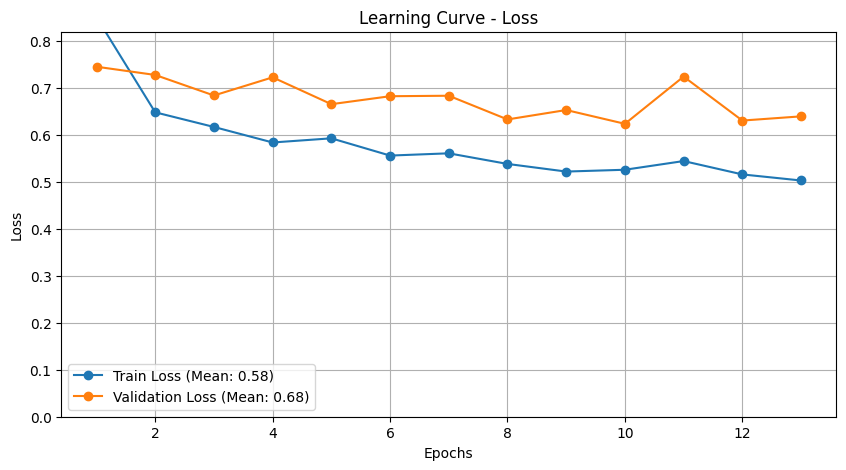

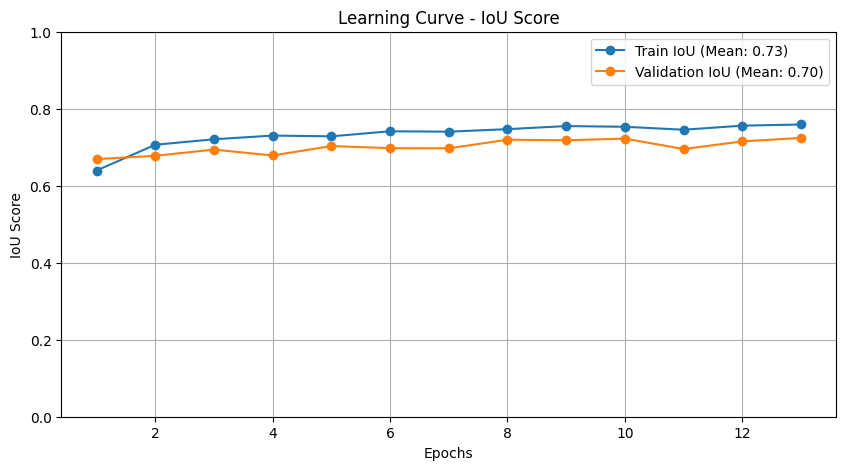

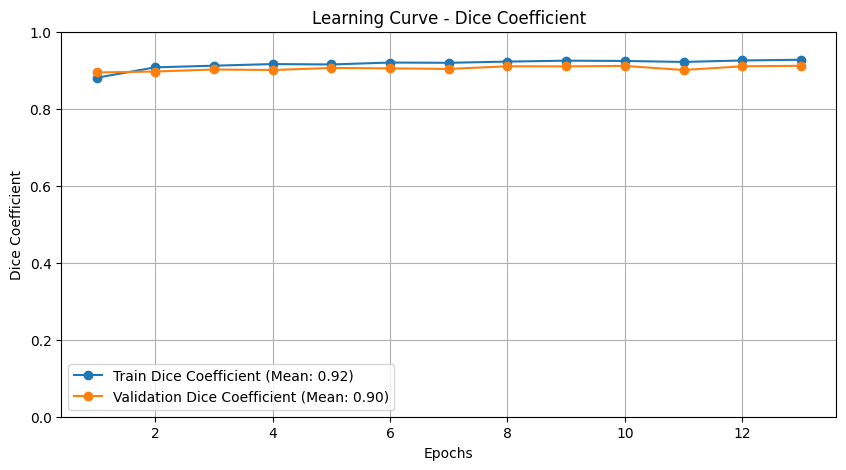

In [ ]:
# Vérification que les variables existent avant de tracer les courbes
if 'train_losses' in locals() and 'val_losses' in locals():
    mean_train_loss = sum(train_losses) / len(train_losses) if train_losses else 0
    mean_val_loss = sum(val_losses) / len(val_losses) if val_losses else 0
    mean_train_iou = sum(train_iou_scores) / len(train_iou_scores) if train_iou_scores else 0
    mean_val_iou = sum(val_iou_scores) / len(val_iou_scores) if val_iou_scores else 0
    mean_train_f1 = sum(train_f1_scores) / len(train_f1_scores) if train_f1_scores else 0
    mean_val_f1 = sum(val_f1_scores) / len(val_f1_scores) if val_f1_scores else 0

    # Courbe de la perte (Loss)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label=f"Train Loss (Mean: {mean_train_loss:.2f})", marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label=f"Validation Loss (Mean: {mean_val_loss:.2f})", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Learning Curve - Loss")
    plt.legend()
    plt.grid()
    plt.ylim([0, max(val_losses) * 1.1])
    plt.show()

    # Courbe de l'IoU
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_iou_scores) + 1), train_iou_scores, label=f"Train IoU (Mean: {mean_train_iou:.2f})", marker='o')
    plt.plot(range(1, len(val_iou_scores) + 1), val_iou_scores, label=f"Validation IoU (Mean: {mean_val_iou:.2f})", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("IoU Score")
    plt.title("Learning Curve - IoU Score")
    plt.legend()
    plt.grid()
    plt.ylim([0, 1])
    plt.show()

    # Courbe du Dice Coefficient
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_f1_scores) + 1), train_f1_scores, label=f"Train Dice Coefficient (Mean: {mean_train_f1:.2f})", marker='o')
    plt.plot(range(1, len(val_f1_scores) + 1), val_f1_scores, label=f"Validation Dice Coefficient (Mean: {mean_val_f1:.2f})", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Dice Coefficient")
    plt.title("Learning Curve - Dice Score")
    plt.legend()
    plt.grid()
    plt.ylim([0, 1])
    plt.show()

In [ ]:
# Création du DataFrame des résultats
df_scores_fpn = pd.DataFrame({
    "Epoch": list(range(1, len(train_losses) + 1)),
    "Train Loss": train_losses,
    "Val Loss": val_losses,
    "Train IoU": train_iou_scores,
    "Val IoU": val_iou_scores,
    "Train Dice": train_f1_scores,
    "Val Dice": val_f1_scores
})

display(df_scores_fpn)

,Epoch,Train Loss,Val Loss,Train IoU,Val IoU,Train Dice,Val Dice
0,1,0.850519,0.745185,0.639449,0.669032,0.880392,0.894117
1,2,0.648112,0.727657,0.706383,0.677768,0.907487,0.896657
2,3,0.616932,0.683941,0.720700,0.693835,0.911759,0.901898
3,4,0.583881,0.722596,0.730258,0.678596,0.915961,0.900572
4,5,0.592747,0.665435,0.728282,0.702995,0.914944,0.905869
5,6,0.556011,0.682381,0.741439,0.697544,0.919938,0.904824
6,7,0.560810,0.683412,0.740380,0.697231,0.919278,0.903379
7,8,0.538217,0.632947,0.746923,0.719467,0.922407,0.910218
8,9,0.521973,0.652988,0.754947,0.718084,0.924808,0.909980
9,10,0.525824,0.623621,0.753102,0.722363,0.924069,0.911184


In [ ]:
# Chemin de sauvegarde
csv_path = "/content/drive/My Drive/projet 9/fpn_results_verif.csv"

df_scores_fpn.to_csv(csv_path, index=False)

print(f"Résultats de Mask2Former sauvegardés en : {csv_path}")

Résultats de Mask2Former sauvegardés en : /content/drive/My Drive/projet 9/fpn_results_verif.csv


##### <font color='blue'>5.3 FPN + ConvNext V2</font><a class="anchor" id="partie5.3"></a>

###### <font color='purple'>Conception

In [ ]:
class FPN_ConvNeXtV2_Segmenter(nn.Module):
    def __init__(self, num_classes=8):
        super(FPN_ConvNeXtV2_Segmenter, self).__init__()

        # ✅ Charger ConvNeXt V2-Large pré-entraîné
        self.convnext_backbone = timm.create_model("convnextv2_large", pretrained=True, features_only=True)

        # ✅ Convolutions latérales 1x1 pour aligner les features avec FPN
        self.lateral_convs = nn.ModuleList([
            nn.Conv2d(192, 256, kernel_size=1),   # Feature 0 (128x128)
            nn.Conv2d(384, 256, kernel_size=1),   # Feature 1 (64x64)
            nn.Conv2d(768, 256, kernel_size=1),   # Feature 2 (32x32)
            nn.Conv2d(1536, 256, kernel_size=1),  # Feature 3 (16x16)
        ])

        # ✅ Convolutions 3x3 après fusion des features
        self.fpn_convs = nn.ModuleList([
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
        ])

        # ✅ Convolution finale pour segmentation
        self.final_conv = nn.Conv2d(256, num_classes, kernel_size=1)

    def forward(self, x):
        """Passage avant du modèle FPN + ConvNeXtV2-L"""

        # ✅ Extraire les features de ConvNeXt V2-Large
        features = self.convnext_backbone(x)

        # ✅ Appliquer les convolutions latérales 1x1
        fpn_features = [conv(feat) for feat, conv in zip(features, self.lateral_convs)]

        # ✅ Fusionner les features FPN (du plus bas niveau au plus haut)
        for i in range(len(fpn_features) - 1, 0, -1):
            fpn_features[i - 1] += F.interpolate(fpn_features[i], scale_factor=2, mode="bilinear", align_corners=False)

        # ✅ Appliquer les convolutions FPN après fusion
        fpn_features = [conv(feat) for feat, conv in zip(fpn_features, self.fpn_convs)]

        # ✅ Prendre la feature la plus large (128x128)
        output = fpn_features[0]

        # ✅ Convolution finale pour segmentation
        output = self.final_conv(output)

        # ✅ Upsample à la taille de l'image d'entrée (512x512)
        output = F.interpolate(output, size=(512, 512), mode="bilinear", align_corners=False)

        return output

# Test rapide
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fpn_convnextv2_model = FPN_ConvNeXtV2_Segmenter(num_classes=8).to(device)

# Tester avec une image aléatoire de 512x512
test_input = torch.randn(1, 3, 512, 512).to(device)
output = fpn_convnextv2_model(test_input)

print(f"✅ Output Shape: {output.shape}")  # Doit être [1, 8, 512, 512]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/792M [00:00<?, ?B/s]

✅ Output Shape: torch.Size([1, 8, 512, 512])


###### <font color='purple'>inititalisation du modele et métriques

In [ ]:
# Initialiser le modèle FPN + ConvNeXt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
convnext_fpn_model = FPN_ConvNeXtV2_Segmenter(num_classes=8).to(device)

# Recalcule des poids des classes basés sur le dataset
pixel_counts = np.array([155762490, 500045310, 270095790, 26958930, 208526930, 38548510, 17382500, 93399540])
total_pixels = np.sum(pixel_counts)
class_weights = total_pixels / (len(pixel_counts) * pixel_counts)

# Normalisation des poids
class_weights = torch.tensor(class_weights / np.sum(class_weights), dtype=torch.float32).to(device)

# Définition de la fonction de perte
loss_fn = TotalLoss(class_weights=class_weights).to(device)

# Définition de l'optimiseur et du scheduler
optimizer = torch.optim.Adam(convnext_fpn_model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.3, patience=4, verbose=True)

# Chargement des métriques
iou_metric = torchmetrics.JaccardIndex(task="multiclass", num_classes=8).to(device)
f1_metric = torchmetrics.F1Score(task="multiclass", num_classes=8).to(device)

###### <font color='purple'>entrainement

In [ ]:
def train_convnext_fpn(model, train_loader, val_loader, loss_fn, optimizer, scheduler, num_epochs, patience=4, num_classes=8):
    train_losses, val_losses = [], []
    train_iou_scores, val_iou_scores = [], []
    train_f1_scores, val_f1_scores = [], []

    best_val_loss = float('inf')
    patience_counter = 0
    start_time = time.time()

    # Dictionnaires pour stocker les statistiques par classe
    true_pixel_counts = defaultdict(int)
    pred_pixel_counts = defaultdict(int)
    correct_pixel_counts = defaultdict(int)

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        # Phase d'entrainement
        model.train()
        train_loss, train_iou, train_f1 = 0.0, 0.0, 0.0
        for images, masks in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{num_epochs}"):
            images, masks = images.to(device), masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            loss = loss_fn(outputs, masks)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_iou += iou_metric(preds, masks).item()
            train_f1 += f1_metric(preds, masks).item()

        # Normalisation AVANT affichage
        train_loss /= len(train_loader)
        train_iou /= len(train_loader)
        train_f1 /= len(train_loader)

        # Ajout aux listes (inchangé)
        train_losses.append(train_loss)
        train_iou_scores.append(train_iou)
        train_f1_scores.append(train_f1)

        # Affichage des valeurs correctement normalisées
        print(f"Train Loss: {train_loss:.4f}, Train IoU: {train_iou:.4f}, Train F1: {train_f1:.4f}")

        # Phase de validation
        model.eval()
        val_loss, val_iou, val_f1 = 0.0, 0.0, 0.0
        with torch.no_grad():
            for images, masks in tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{num_epochs}"):
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)
                preds = torch.argmax(outputs, dim=1)

                loss = loss_fn(outputs, masks)
                val_loss += loss.item()
                val_iou += iou_metric(preds, masks).item()
                val_f1 += f1_metric(preds, masks).item()

                # Mise à jour des compteurs de pixels
                for class_id in range(num_classes):
                    true_pixel_counts[class_id] += (masks == class_id).sum().item()
                    pred_pixel_counts[class_id] += (preds == class_id).sum().item()
                    correct_pixel_counts[class_id] += ((masks == class_id) & (preds == class_id)).sum().item()

        # Normalisation AVANT affichage et stockage
        val_loss /= len(val_loader)
        val_iou /= len(val_loader)
        val_f1 /= len(val_loader)

        val_losses.append(val_loss)
        val_iou_scores.append(val_iou)
        val_f1_scores.append(val_f1)

        print(f"Val Loss: {val_loss:.4f}, Val IoU: {val_iou:.4f}, Val F1: {val_f1:.4f}")

        scheduler.step(val_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= patience:
            print("⏳ Early stopping triggered")
            break

        torch.cuda.empty_cache()  # Libération mémoire GPU entre les époques

    # Sauvegarde finale du modèle
    model_save_path = "/content/drive/My Drive/projet 9/convnext-V2_fpn_best_final.pth"
    torch.save(model, model_save_path)
    print(f"Modèle ConvNeXt-V2 + FPN sauvegardé en {model_save_path}")

    elapsed_time = time.time() - start_time
    print(f"Training terminé en {elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s")

    return train_losses, val_losses, train_iou_scores, val_iou_scores, train_f1_scores, val_f1_scores, true_pixel_counts, pred_pixel_counts, correct_pixel_counts

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
train_losses, val_losses, train_iou_scores, val_iou_scores, train_f1_scores, val_f1_scores, true_pixel_counts, pred_pixel_counts, correct_pixel_counts = train_convnext_fpn(
    convnext_fpn_model, train_loader, val_loader, loss_fn, optimizer, scheduler, num_epochs=40, num_classes=8
)

Epoch 1/40


Training Epoch 1/40: 100%|██████████| 372/372 [05:07<00:00,  1.21it/s]


Train Loss: 1.0970, Train IoU: 0.6745, Train F1: 0.8727


Validation Epoch 1/40: 100%|██████████| 63/63 [00:16<00:00,  3.90it/s]


Val Loss: 0.7871, Val IoU: 0.7040, Val F1: 0.8981
Epoch 2/40


Training Epoch 2/40: 100%|██████████| 372/372 [05:07<00:00,  1.21it/s]


Train Loss: 0.6215, Train IoU: 0.7463, Train F1: 0.9169


Validation Epoch 2/40: 100%|██████████| 63/63 [00:16<00:00,  3.88it/s]


Val Loss: 0.7109, Val IoU: 0.7245, Val F1: 0.9085
Epoch 3/40


Training Epoch 3/40: 100%|██████████| 372/372 [05:07<00:00,  1.21it/s]


Train Loss: 0.5441, Train IoU: 0.7693, Train F1: 0.9267


Validation Epoch 3/40: 100%|██████████| 63/63 [00:16<00:00,  3.86it/s]


Val Loss: 0.6911, Val IoU: 0.7379, Val F1: 0.9116
Epoch 4/40


Training Epoch 4/40: 100%|██████████| 372/372 [05:07<00:00,  1.21it/s]


Train Loss: 0.5131, Train IoU: 0.7784, Train F1: 0.9306


Validation Epoch 4/40: 100%|██████████| 63/63 [00:16<00:00,  3.87it/s]


Val Loss: 0.6727, Val IoU: 0.7411, Val F1: 0.9113
Epoch 5/40


Training Epoch 5/40: 100%|██████████| 372/372 [05:07<00:00,  1.21it/s]


Train Loss: 0.4773, Train IoU: 0.7910, Train F1: 0.9357


Validation Epoch 5/40: 100%|██████████| 63/63 [00:16<00:00,  3.88it/s]


Val Loss: 0.6571, Val IoU: 0.7442, Val F1: 0.9062
Epoch 6/40


Training Epoch 6/40: 100%|██████████| 372/372 [05:07<00:00,  1.21it/s]


Train Loss: 0.4529, Train IoU: 0.7969, Train F1: 0.9382


Validation Epoch 6/40: 100%|██████████| 63/63 [00:16<00:00,  3.90it/s]


Val Loss: 0.6920, Val IoU: 0.7571, Val F1: 0.9188
Epoch 7/40


Training Epoch 7/40: 100%|██████████| 372/372 [05:07<00:00,  1.21it/s]


Train Loss: 0.4570, Train IoU: 0.7970, Train F1: 0.9379


Validation Epoch 7/40: 100%|██████████| 63/63 [00:16<00:00,  3.88it/s]


Val Loss: 0.7214, Val IoU: 0.7586, Val F1: 0.9162
Epoch 8/40


Training Epoch 8/40: 100%|██████████| 372/372 [05:07<00:00,  1.21it/s]


Train Loss: 0.4195, Train IoU: 0.8068, Train F1: 0.9426


Validation Epoch 8/40: 100%|██████████| 63/63 [00:16<00:00,  3.89it/s]


Val Loss: 0.7569, Val IoU: 0.7603, Val F1: 0.9182
Epoch 9/40


Training Epoch 9/40: 100%|██████████| 372/372 [05:07<00:00,  1.21it/s]


Train Loss: 0.4189, Train IoU: 0.8076, Train F1: 0.9421


Validation Epoch 9/40: 100%|██████████| 63/63 [00:16<00:00,  3.91it/s]


Val Loss: 0.7104, Val IoU: 0.7533, Val F1: 0.9175
⏳ Early stopping triggered
Modèle ConvNeXt-V2 + FPN sauvegardé en /content/drive/My Drive/projet 9/convnext-V2_fpn_best_verif.pth
Training terminé en 48m 37s


In [ ]:
import pandas as pd

# 📊 Construction du DataFrame des résultats par classe
class_labels = ["Route", "Trottoir", "Bâtiment", "Végétation", "Ciel", "Véhicule", "Personne", "Mobilier urbain"]

df_pixels_convnext_V2 = pd.DataFrame({
    "Classe": class_labels,
    "Pixels réels": [true_pixel_counts[i] for i in range(len(class_labels))],
    "Pixels prédits": [pred_pixel_counts[i] for i in range(len(class_labels))],
    "Corrects": [correct_pixel_counts[i] for i in range(len(class_labels))],
    "Précision (%)": [(correct_pixel_counts[i] / true_pixel_counts[i] * 100) if true_pixel_counts[i] > 0 else 0 for i in range(len(class_labels))]
})

# 🔹 Affichage du DataFrame
display(df_pixels_convnext_V2)

# 🔹 Sauvegarde en CSV
df_pixels_convnext_V2.to_csv("/content/drive/My Drive/projet 9/convnext_V2_fpn_pixels_final.csv", index=False)
print("📁 Résultats sauvegardés en CSV ✅")

,Classe,Pixels réels,Pixels prédits,Corrects,Précision (%)
0,Route,140186241,116200872,102218848,72.916463
1,Trottoir,450040779,457651903,434732550,96.598480
2,Bâtiment,243086211,235805610,219018765,90.099214
3,Végétation,24263037,36901262,18327056,75.534880
4,Ciel,187674237,184552121,173535061,92.466107
5,Véhicule,34693659,37047391,33789420,97.393648
6,Personne,15644250,24368131,14622180,93.466801
7,Mobilier urbain,84059586,87120710,78964108,93.938255


📁 Résultats sauvegardés en CSV ✅


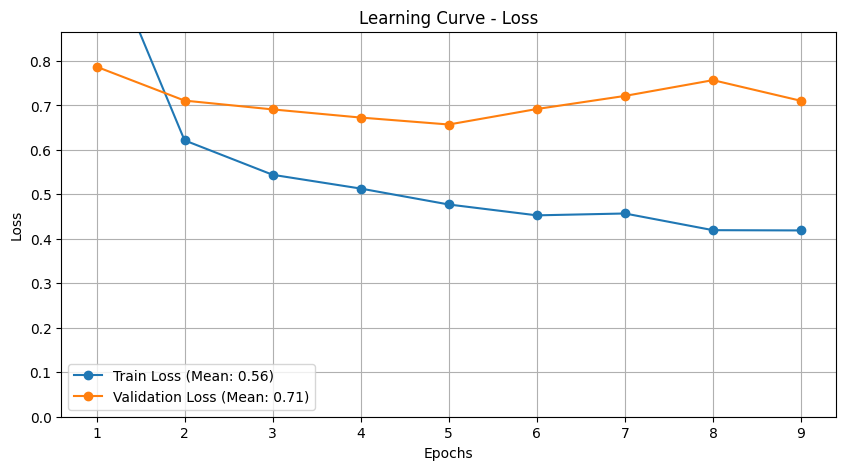

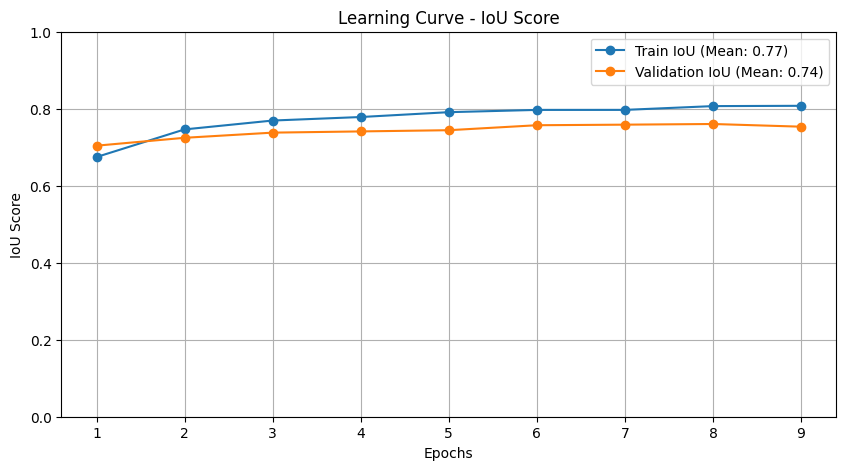

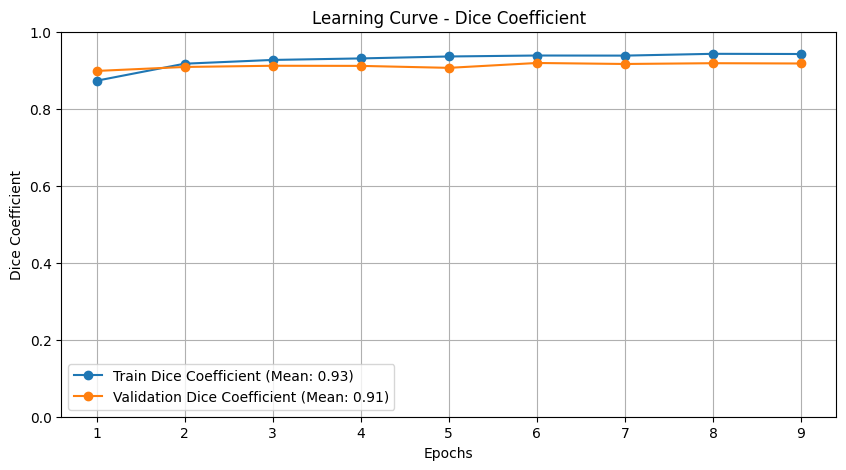

In [ ]:
# Vérification que les variables existent avant de tracer les courbes
if 'train_losses' in locals() and 'val_losses' in locals():
    mean_train_loss = sum(train_losses) / len(train_losses) if train_losses else 0
    mean_val_loss = sum(val_losses) / len(val_losses) if val_losses else 0
    mean_train_iou = sum(train_iou_scores) / len(train_iou_scores) if train_iou_scores else 0
    mean_val_iou = sum(val_iou_scores) / len(val_iou_scores) if val_iou_scores else 0
    mean_train_f1 = sum(train_f1_scores) / len(train_f1_scores) if train_f1_scores else 0
    mean_val_f1 = sum(val_f1_scores) / len(val_f1_scores) if val_f1_scores else 0

    # Courbe de la perte (Loss)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label=f"Train Loss (Mean: {mean_train_loss:.2f})", marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label=f"Validation Loss (Mean: {mean_val_loss:.2f})", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Learning Curve - Loss")
    plt.legend()
    plt.grid()
    plt.ylim([0, max(val_losses) * 1.1])  # Normalisation de l'échelle
    plt.show()

    # Courbe de l'IoU
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_iou_scores) + 1), train_iou_scores, label=f"Train IoU (Mean: {mean_train_iou:.2f})", marker='o')
    plt.plot(range(1, len(val_iou_scores) + 1), val_iou_scores, label=f"Validation IoU (Mean: {mean_val_iou:.2f})", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("IoU Score")
    plt.title("Learning Curve - IoU Score")
    plt.legend()
    plt.grid()
    plt.ylim([0, 1])  # IoU est compris entre 0 et 1
    plt.show()

    # Courbe du Dice Coefficient (F1-Score)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_f1_scores) + 1), train_f1_scores, label=f"Train Dice Coefficient (Mean: {mean_train_f1:.2f})", marker='o')
    plt.plot(range(1, len(val_f1_scores) + 1), val_f1_scores, label=f"Validation Dice Coefficient (Mean: {mean_val_f1:.2f})", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Dice Coefficient")
    plt.title("Learning Curve - Dice Score")
    plt.legend()
    plt.grid()
    plt.ylim([0, 1])  # Dice coefficient (F1-score) est entre 0 et 1
    plt.show()

In [ ]:
# Création du DataFrame des résultats
df_scores_convnext_final = pd.DataFrame({
    "Epoch": list(range(1, len(train_losses) + 1)),
    "Train Loss": train_losses,
    "Val Loss": val_losses,
    "Train IoU": train_iou_scores,
    "Val IoU": val_iou_scores,
    "Train Dice": train_f1_scores,
    "Val Dice": val_f1_scores
})

display(df_scores_convnext_final)

,Epoch,Train Loss,Val Loss,Train IoU,Val IoU,Train Dice,Val Dice
0,1,1.097009,0.787092,0.674514,0.703990,0.872689,0.898123
1,2,0.621486,0.710913,0.746285,0.724466,0.916941,0.908470
2,3,0.544083,0.691103,0.769302,0.737894,0.926716,0.911602
3,4,0.513081,0.672746,0.778439,0.741052,0.930638,0.911273
4,5,0.477262,0.657150,0.791038,0.744206,0.935698,0.906159
5,6,0.452858,0.691992,0.796912,0.757119,0.938191,0.918803
6,7,0.457038,0.721433,0.796967,0.758596,0.937946,0.916220
7,8,0.419522,0.756899,0.806786,0.760328,0.942615,0.918233
8,9,0.418933,0.710377,0.807563,0.753350,0.942126,0.917481


In [ ]:
# Chemin de sauvegarde
csv_path = "/content/drive/My Drive/projet 9/convnext_results_final.csv"

df_scores_convnext_final.to_csv(csv_path, index=False)

print(f"Résultats de Convnext sauvegardés en : {csv_path}")

Résultats de Convnext sauvegardés en : /content/drive/My Drive/projet 9/convnext_results_final.csv


## <font color='red'>6. Conclusion</font><a class="anchor" id="partie6"></a>

**Courbes d’apprentissage**
- Loss :
ConvNeXt V2 converge plus rapidement et de manière plus stable que ResNet50.
La validation Loss est plus lisse, signe d’une meilleure généralisation.

- IoU Score :
ConvNeXt V2 dépasse ResNet50 dès la 2ᵉ époque, atteignant un IoU final de 74.4% (vs 70.2% pour ResNet50).
La progression est plus rapide et plus régulière.

- Dice Score :
ConvNeXt V2 obtient un Dice Score plus élevé (~93.5%), avec une meilleure stabilité en validation.
ResNet50 reste plus fluctuant.


**Comparaison des prédictions pixel par pixel**
ConvNeXt V2 est supérieur sur presque toutes les classes 🚀 :

- Végétation 🌿 : +40.41%
- Personne 🚶 : +16.76%
- Route 🛣️ : +5.61%
- Mobilier urbain 🏗️ : +1.93%

Les deux modèles sont proches sur les classes très distinctes (Trottoir, Ciel, Véhicule, Bâtiment).
ResNet50 a du mal avec les objets petits ou sous-représentés.

**Conclusion globale**
- FPN + ConvNeXt V2 surpasse FPN + ResNet50 en précision et stabilité.
- Meilleure segmentation des objets détaillés (végétation, piétons, mobilier urbain).
- Meilleure généralisation en validation.
- Temps d’inférence légèrement plus long (+1.66x), mais acceptable.

ConvNeXt V2 est une amélioration significative sur ResNet50 pour la segmentation urbaine.

## <font color='red'>7. Annexe</font><a class="anchor" id="partie7"></a>

### <font color='purple'> Grad-Cam

#### <font color='purple'> Resnet

<ipython-input-45-24ec9e5e8e41>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("/content/drive/My Drive/projet 9/fpn_best.pth", map_location=torch.devi

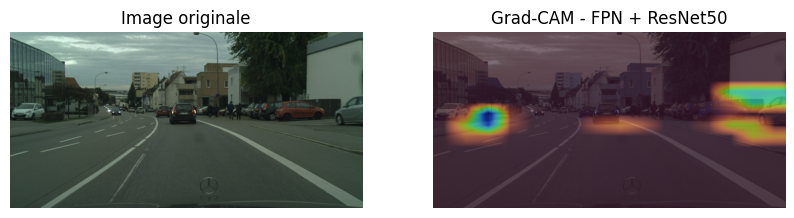

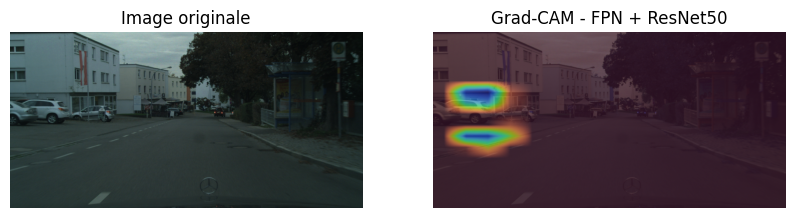

<ipython-input-45-24ec9e5e8e41>:73: RuntimeWarning: invalid value encountered in divide
  cam = (cam - cam.min()) / (cam.max() - cam.min())
<ipython-input-45-24ec9e5e8e41>:100: RuntimeWarning: invalid value encountered in cast
  heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_TURBO)


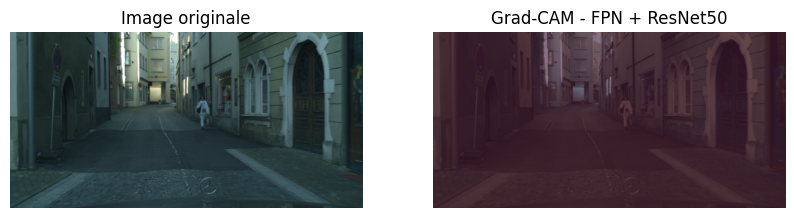

In [ ]:
# ✅ Classe correcte pour charger les poids de FPN
class FPN_Segmenter(torch.nn.Module):
    def __init__(self, num_classes=8):
        super(FPN_Segmenter, self).__init__()

        # Charger le backbone FPN tout prêt
        self.fpn_backbone = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="COCO_V1").backbone

        # Tête de segmentation : 1x1 conv pour réduire les canaux
        self.final_conv = torch.nn.Conv2d(256, num_classes, kernel_size=1)

    def forward(self, x):
        """Passe avant du modèle FPN + segmentation"""

        # Extraire les features multi-échelles du FPN
        fpn_features = self.fpn_backbone(x)

        # Prendre la feature map de niveau P2 (la plus grande, 128x128)
        p2 = fpn_features['0']

        # Appliquer la convolution finale pour obtenir `num_classes` canaux
        output = self.final_conv(p2)

        # Upsample à la taille de l'image d'entrée (512x512)
        output = F.interpolate(output, size=(512, 512), mode="bilinear", align_corners=False)

        return output

# ✅ Charger les poids correctement
model = FPN_Segmenter(num_classes=8)
model = torch.load("/content/drive/My Drive/projet 9/fpn_best.pth", map_location=torch.device('cpu'))
model.eval()

# ✅ Définir la couche cible pour Grad-CAM
target_layer = model.fpn_backbone.body.layer4[-1]  # Dernière couche convolutive de ResNet50 dans FPN

# ✅ Fonction pour générer Grad-CAM
def generate_grad_cam(model, image_tensor, target_layer):
    gradients = []
    activations = []

    def forward_hook(module, input, output):
        activations.append(output.detach())

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0])

    hook_fwd = target_layer.register_forward_hook(forward_hook)
    hook_bwd = target_layer.register_backward_hook(backward_hook)

    output = model(image_tensor)
    class_idx = output.argmax(dim=1)

    model.zero_grad()
    output.mean().backward()

    gradients = gradients[0].cpu().numpy()
    activations = activations[0].cpu().numpy()

    weights = np.mean(gradients, axis=(2, 3), keepdims=True)
    cam = np.sum(weights * activations, axis=1)
    cam = np.maximum(cam, 0)  # Relu
    cam = cv2.resize(cam[0], (512, 512))
    cam = (cam - cam.min()) / (cam.max() - cam.min())

    hook_fwd.remove()
    hook_bwd.remove()

    return cam

# ✅ Charger les mêmes images test que pour ConvNeXt V2
image_paths = [
    "/content/drive/My Drive/projet 8/P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/lindau/lindau_000005_000019_leftImg8bit.png",
    "/content/drive/My Drive/projet 8/P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/lindau/lindau_000010_000019_leftImg8bit.png",
    "/content/drive/My Drive/projet 8/P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/lindau/lindau_000020_000019_leftImg8bit.png"
]

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

# ✅ Appliquer Grad-CAM et afficher les résultats
for image_path in image_paths:
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image)
    image_tensor = image_tensor.unsqueeze(0)  # Ajoute une seule dimension batch

    cam = generate_grad_cam(model, image_tensor, target_layer)

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_TURBO)
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    heatmap_resized = cv2.resize(heatmap, (image_cv.shape[1], image_cv.shape[0]))

    overlay = cv2.addWeighted(image_cv, 0.4, heatmap_resized, 0.6, 0)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image originale")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title("Grad-CAM - FPN + ResNet50")
    plt.axis("off")

    plt.show()


#### <font color='purple'> ConvNext

<ipython-input-44-0ad3ed17a31a>:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("/content/drive/My Drive/projet 9/convnext-V2_fpn_best.pth", map_locatio

dict_keys(['', 'stem_0', 'stem_1', 'stages_0', 'stages_0.downsample', 'stages_0.blocks', 'stages_0.blocks.0', 'stages_0.blocks.0.conv_dw', 'stages_0.blocks.0.norm', 'stages_0.blocks.0.mlp', 'stages_0.blocks.0.mlp.fc1', 'stages_0.blocks.0.mlp.act', 'stages_0.blocks.0.mlp.drop1', 'stages_0.blocks.0.mlp.grn', 'stages_0.blocks.0.mlp.fc2', 'stages_0.blocks.0.mlp.drop2', 'stages_0.blocks.0.shortcut', 'stages_0.blocks.0.drop_path', 'stages_0.blocks.1', 'stages_0.blocks.1.conv_dw', 'stages_0.blocks.1.norm', 'stages_0.blocks.1.mlp', 'stages_0.blocks.1.mlp.fc1', 'stages_0.blocks.1.mlp.act', 'stages_0.blocks.1.mlp.drop1', 'stages_0.blocks.1.mlp.grn', 'stages_0.blocks.1.mlp.fc2', 'stages_0.blocks.1.mlp.drop2', 'stages_0.blocks.1.shortcut', 'stages_0.blocks.1.drop_path', 'stages_0.blocks.2', 'stages_0.blocks.2.conv_dw', 'stages_0.blocks.2.norm', 'stages_0.blocks.2.mlp', 'stages_0.blocks.2.mlp.fc1', 'stages_0.blocks.2.mlp.act', 'stages_0.blocks.2.mlp.drop1', 'stages_0.blocks.2.mlp.grn', 'stages_0.bl

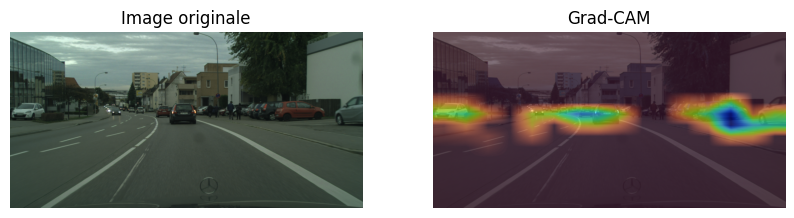

Shape après transform: torch.Size([3, 512, 512])
Shape après unsqueeze: torch.Size([1, 3, 512, 512])


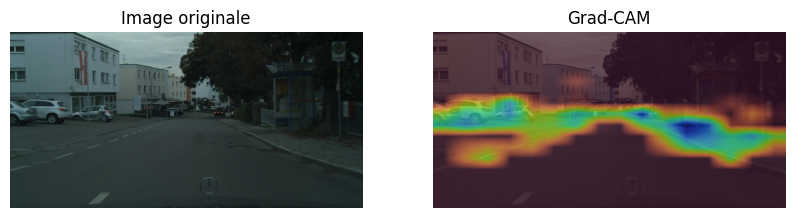

Shape après transform: torch.Size([3, 512, 512])
Shape après unsqueeze: torch.Size([1, 3, 512, 512])


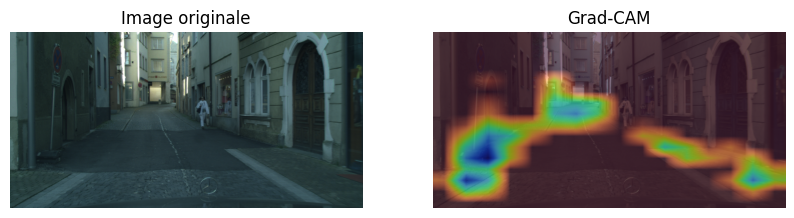

In [ ]:
# ✅ Charger le modèle FPN + ConvNeXt V2 Large avec les poids entraînés
from timm import create_model

class FPN_ConvNeXtV2_Segmenter(torch.nn.Module):
    def __init__(self, num_classes=8):
        super(FPN_ConvNeXtV2_Segmenter, self).__init__()
        self.convnext_backbone = create_model("convnextv2_large", pretrained=False, features_only=True)
        self.lateral_convs = torch.nn.ModuleList([
            torch.nn.Conv2d(192, 256, kernel_size=1),
            torch.nn.Conv2d(384, 256, kernel_size=1),
            torch.nn.Conv2d(768, 256, kernel_size=1),
            torch.nn.Conv2d(1536, 256, kernel_size=1),
        ])
        self.final_conv = torch.nn.Conv2d(256, num_classes, kernel_size=1)

    def forward(self, x):
        features = self.convnext_backbone(x)
        output = self.lateral_convs[-1](features[-1])  # Dernière couche
        return self.final_conv(output)

# ✅ Charger les poids entraînés
model = FPN_ConvNeXtV2_Segmenter()
model = torch.load("/content/drive/My Drive/projet 9/convnext-V2_fpn_best.pth", map_location=torch.device('cpu'))
model.eval()

print(dict(model.convnext_backbone.named_modules()).keys())

# ✅ Sélectionner une couche cible pour Grad-CAM (dernier bloc ConvNeXt V2 Large)
target_layer = model.convnext_backbone.stages_3.blocks[-1].conv_dw

# ✅ Fonction pour générer Grad-CAM
def generate_grad_cam(model, image_tensor, target_layer):
    gradients = []
    activations = []

    def forward_hook(module, input, output):
        activations.append(output.detach())

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0])

    hook_fwd = target_layer.register_forward_hook(forward_hook)
    hook_bwd = target_layer.register_backward_hook(backward_hook)

    output = model(image_tensor)
    class_idx = output.argmax(dim=1)

    model.zero_grad()
    output.mean().backward()

    gradients = gradients[0].cpu().numpy()
    activations = activations[0].cpu().numpy()

    weights = np.mean(gradients, axis=(2, 3), keepdims=True)
    cam = np.sum(weights * activations, axis=1)
    cam = np.maximum(cam, 0)  # Relu
    cam = cv2.resize(cam[0], (512, 512))
    cam = (cam - cam.min()) / (cam.max() - cam.min())

    hook_fwd.remove()
    hook_bwd.remove()

    return cam

# ✅ Charger des images de test Cityscapes
image_paths = [
    "/content/drive/My Drive/projet 8/P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/lindau/lindau_000005_000019_leftImg8bit.png",
    "/content/drive/My Drive/projet 8/P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/lindau/lindau_000010_000019_leftImg8bit.png",
    "/content/drive/My Drive/projet 8/P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/lindau/lindau_000020_000019_leftImg8bit.png"
]

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

# ✅ Appliquer Grad-CAM et afficher les résultats
for image_path in image_paths:
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image)
    print("Shape après transform:", image_tensor.shape)  # Devrait afficher torch.Size([3, 512, 512])

    image_tensor = image_tensor.unsqueeze(0)  # Ajoute une seule dimension batch
    print("Shape après unsqueeze:", image_tensor.shape)  # Devrait afficher torch.Size([1, 3, 512, 512])


    cam = generate_grad_cam(model, image_tensor, target_layer)

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_TURBO)
    # Convertir l'image en format OpenCV BGR
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Redimensionner la heatmap pour qu'elle corresponde à l'image originale
    heatmap_resized = cv2.resize(heatmap, (image_cv.shape[1], image_cv.shape[0]))

    # Fusionner avec cv2.addWeighted
    overlay = cv2.addWeighted(image_cv, 0.4, heatmap_resized, 0.6, 0)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image originale")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title("Grad-CAM")
    plt.axis("off")

    plt.show()


### <font color='purple'>heatmap des activations moyennes

In [ ]:
# Fixer la seed pour la reproductibilité
random.seed(42)
torch.manual_seed(42)

In [ ]:
class FPN_Segmenter(torch.nn.Module):
    def __init__(self, num_classes=8):
        super(FPN_Segmenter, self).__init__()
        self.fpn_backbone = models.detection.fasterrcnn_resnet50_fpn(weights="COCO_V1").backbone
        self.final_conv = torch.nn.Conv2d(256, num_classes, kernel_size=1)

    def forward(self, x):
        fpn_features = self.fpn_backbone(x)
        p2 = fpn_features['0']  # Niveau P2 (haute résolution)
        output = self.final_conv(p2)
        output = F.interpolate(output, size=(512, 512), mode="bilinear", align_corners=False)
        return output

# Charger le modèle entraîné
model_resnet50 = torch.load("/content/drive/My Drive/projet 9/fpn_best.pth", map_location=torch.device('cpu'))
model_resnet50.eval()

<ipython-input-22-4e61c885e50e>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_resnet50 = torch.load("/content/drive/My Drive/projet 9/fpn_best.pth", map_location=t

FPN_Segmenter(
  (fpn_backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, e

In [ ]:
from timm import create_model

class FPN_ConvNeXtV2_Segmenter(torch.nn.Module):
    def __init__(self, num_classes=8):
        super(FPN_ConvNeXtV2_Segmenter, self).__init__()
        self.convnext_backbone = create_model("convnextv2_large", pretrained=False, features_only=True)
        self.lateral_convs = torch.nn.ModuleList([
            torch.nn.Conv2d(192, 256, kernel_size=1),
            torch.nn.Conv2d(384, 256, kernel_size=1),
            torch.nn.Conv2d(768, 256, kernel_size=1),
            torch.nn.Conv2d(1536, 256, kernel_size=1),
        ])
        self.final_conv = torch.nn.Conv2d(256, num_classes, kernel_size=1)

    def forward(self, x):
        features = self.convnext_backbone(x)
        output = self.lateral_convs[-1](features[-1])  # Dernière couche
        return self.final_conv(output)

# Charger le modèle entraîné
model_convnext = torch.load("/content/drive/My Drive/projet 9/convnext-V2_fpn_best.pth", map_location=torch.device('cpu'))
model_convnext.eval()


<ipython-input-21-04a022c6f5e7>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_convnext = torch.load("/content/drive/My Drive/projet 9/convnext-V2_fpn_best.pth", ma

FPN_ConvNeXtV2_Segmenter(
  (convnext_backbone): FeatureListNet(
    (stem_0): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
    (stem_1): LayerNorm2d((192,), eps=1e-06, elementwise_affine=True)
    (stages_0): ConvNeXtStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): ConvNeXtBlock(
          (conv_dw): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
          (norm): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
          (mlp): GlobalResponseNormMlp(
            (fc1): Linear(in_features=192, out_features=768, bias=True)
            (act): GELU()
            (drop1): Dropout(p=0.0, inplace=False)
            (grn): GlobalResponseNorm()
            (fc2): Linear(in_features=768, out_features=192, bias=True)
            (drop2): Dropout(p=0.0, inplace=False)
          )
          (shortcut): Identity()
          (drop_path): Identity()
        )
        (1): ConvNeXtBlock(
          (conv_dw): Conv2d(192, 192, ker

In [ ]:
def generate_grad_cam(model, image_tensor, target_layer):
    gradients = []
    activations = []
    print(f"Min: {cam_resnet.min()}, Max: {cam_resnet.max()}")

    def forward_hook(module, input, output):
        activations.append(output.detach())

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0])

    hook_fwd = target_layer.register_forward_hook(forward_hook)
    hook_bwd = target_layer.register_backward_hook(backward_hook)

    output = model(image_tensor)
    class_idx = 3  # Pour la végétation (changer en 6 pour les personnes)
    output[:, class_idx, :, :].mean().backward()


    gradients = gradients[0].cpu().numpy()
    activations = activations[0].cpu().numpy()

    weights = np.mean(gradients, axis=(2, 3), keepdims=True)
    cam = np.sum(weights * activations, axis=1)
    cam = np.maximum(cam, 0)  # Relu
    cam = cv2.resize(cam[0], (512, 512))
    cam = (cam - cam.min()) / (cam.max() - cam.min())

    hook_fwd.remove()
    hook_bwd.remove()

    return cam

In [ ]:
# 📂 Dossier des images Cityscapes (val)
image_dir = "/content/drive/My Drive/projet 8/P8_Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt"
all_images = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(".png")]

# Sélectionner 20 images aléatoirement
selected_images = random.sample(all_images, 40)

# Transformer les images
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

In [ ]:
heatmaps_resnet = []
heatmaps_convnext = []

for image_path in selected_images:
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)

    # Grad-CAM pour ResNet50
    target_layer_resnet = model_resnet50.fpn_backbone.body.layer3[-1]
    cam_resnet = generate_grad_cam(model_resnet50, image_tensor, target_layer_resnet)
    heatmaps_resnet.append(cam_resnet)

    # Grad-CAM pour ConvNeXt V2
    target_layer_convnext = model_convnext.convnext_backbone.stages_3.blocks[-1].conv_dw
    cam_convnext = generate_grad_cam(model_convnext, image_tensor, target_layer_convnext)
    heatmaps_convnext.append(cam_convnext)

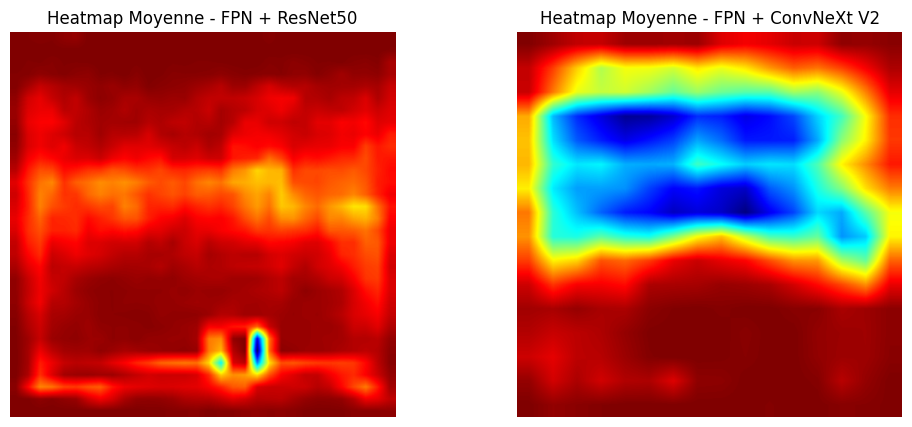

In [ ]:
# Calculer la heatmap moyenne pour chaque modèle
mean_heatmap_resnet = np.mean(np.array(heatmaps_resnet), axis=0)
mean_heatmap_convnext = np.mean(np.array(heatmaps_convnext), axis=0)

# Normalisation
mean_heatmap_resnet = (mean_heatmap_resnet - mean_heatmap_resnet.min()) / (mean_heatmap_resnet.max() - mean_heatmap_resnet.min())
mean_heatmap_convnext = (mean_heatmap_convnext - mean_heatmap_convnext.min()) / (mean_heatmap_convnext.max() - mean_heatmap_convnext.min())

# Générer les images de heatmap
heatmap_resnet = cv2.applyColorMap(np.uint8(255 * mean_heatmap_resnet), cv2.COLORMAP_JET)
heatmap_convnext = cv2.applyColorMap(np.uint8(255 * mean_heatmap_convnext), cv2.COLORMAP_JET)

# Affichage
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(heatmap_resnet)
plt.title("Heatmap Moyenne - FPN + ResNet50")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(heatmap_convnext)
plt.title("Heatmap Moyenne - FPN + ConvNeXt V2")
plt.axis("off")

plt.show()

### <font color='purple'>Mesure de l'inférence

In [ ]:
# Fonction pour mesurer le temps d'inférence
def measure_inference_time(model, image_size=(3, 512, 512), device="cuda"):
    model.to(device)
    model.eval()

    # Générer une image aléatoire (remplacer par une vraie image pré-traitée si besoin)
    image = torch.randn(1, *image_size).to(device)

    # Répéter plusieurs fois pour avoir une moyenne fiable
    num_trials = 50
    times = []

    with torch.no_grad():
        for _ in range(num_trials):
            start_time = time.time()
            _ = model(image)
            end_time = time.time()
            times.append((end_time - start_time) * 1000)  # Convertir en ms

    avg_time = sum(times) / num_trials
    print(f"Temps d'inférence moyen : {avg_time:.2f} ms sur {num_trials} essais")
    return avg_time

# Tester sur FPN + ResNet50
model_resnet50 = torch.load("/content/drive/My Drive/projet 9/fpn_best.pth", map_location=torch.device("cuda"))
inference_time_resnet50 = measure_inference_time(model_resnet50, device="cuda")

# Tester sur FPN + ConvNeXt V2
model_convnext = torch.load("/content/drive/My Drive/projet 9/convnext-V2_fpn_best.pth", map_location=torch.device("cuda"))
inference_time_convnext = measure_inference_time(model_convnext, device="cuda")

# Comparaison des temps d'inférence
print(f"\nComparaison des temps d'inférence :")
print(f"➡️ FPN + ResNet50 : {inference_time_resnet50:.2f} ms")
print(f"➡️ FPN + ConvNeXt V2 : {inference_time_convnext:.2f} ms")

<ipython-input-23-6b6f560c6e32>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_resnet50 = torch.load("/content/drive/My Drive/projet 9/fpn_best.pth", map_location=t

Temps d'inférence moyen : 21.10 ms sur 50 essais


<ipython-input-23-6b6f560c6e32>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_convnext = torch.load("/content/drive/My Drive/projet 9/convnext-V2_fpn_best.pth", ma

Temps d'inférence moyen : 34.96 ms sur 50 essais

Comparaison des temps d'inférence :
➡️ FPN + ResNet50 : 21.10 ms
➡️ FPN + ConvNeXt V2 : 34.96 ms
